In [2]:
import numpy as np  # whole numpy lib is available, prepend 'np.'
from numpy import average, std
from numpy.random import random, randint, normal, shuffle,uniform
import scipy
from scipy.stats import ttest_ind
import seaborn as sns
import fnmatch
import os  # handy system and path functions
import sys  # to get file system encoding
import csv
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd  
import matplotlib
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
Pandas version 0.23.4
Matplotlib version 3.0.2


In [3]:
subjects9=['111','112','113','114','115','116','117','118','119','122','123','124','125','126'] #alpha singleton pilot with colors+shapes randomized every trial
all_subjects=[subjects9]

In [4]:
#path to .csv result files with our data 
where_files = r'/home/dcellier/RDSS/AlphaStudy_Data/behavData/'

In [5]:
files=os.listdir(where_files)

In [6]:
#files

In [7]:
all_subs_dfs=[] # a list of dataframes
all_subs_data=pd.DataFrame()
for sub_list in all_subjects:
    for sub_name in sub_list:
        for f_name in files:
            pattern='%s_alpha_singleton_pilot_01_*_*_*_*.csv' %sub_name
            if fnmatch.fnmatch(f_name,pattern):
                print(f_name)
                thisSub_data=pd.read_csv(where_files+f_name) #import subject data if filename matches pattern
                thisSub_data['subject']=sub_name
                all_subs_dfs.append(thisSub_data)
                all_subs_data=all_subs_data.append(thisSub_data)
                
                

111_alpha_singleton_pilot_01_2019_May_28_1230.csv
112_alpha_singleton_pilot_01_2019_May_31_1458.csv
113_alpha_singleton_pilot_01_2019_May_30_1010.csv
114_alpha_singleton_pilot_01_2019_May_30_1510.csv
115_alpha_singleton_pilot_01_2019_Jun_07_1119.csv
116_alpha_singleton_pilot_01_2019_Jun_04_1231.csv
117_alpha_singleton_pilot_01_2019_Jun_05_1006.csv
118_alpha_singleton_pilot_01_2019_Jun_06_1405.csv
119_alpha_singleton_pilot_01_2019_Jun_06_1540.csv
122_alpha_singleton_pilot_01_2019_Jun_14_1354.csv
123_alpha_singleton_pilot_01_2019_Jun_13_0913.csv
124_alpha_singleton_pilot_01_2019_Jun_14_1531.csv
125_alpha_singleton_pilot_01_2019_Jun_25_0900.csv
126_alpha_singleton_pilot_01_2019_Jun_20_1541.csv


In [8]:
all_subs_data

,block,trialNum,trial_type,dis_PresentorAbsent,corrResp,subResp,trialCorr?,RT,"stim_loc(T,D)",ITI,"Tar,Dis,Other",trial_trigs,triggers,subject
0,0,0,dis,Present,up,up,1.0,1.299657,"('5', '3')",1.9,"('blue_diamond', 'red_circle', 'blue_circle')",None,NaN,111
1,0,1,dis,Present,left,left,1.0,1.048731,"('1', '7')",2.0,"('red_diamond', 'yellow_circle', 'red_circle')",None,NaN,111
2,0,2,dis,Present,up,up,1.0,0.698886,"('11', '5')",2.2,"('yellow_diamond', 'blue_circle', 'yellow_circ...",None,NaN,111
3,0,3,dis,Present,up,left,0.0,0.865413,"('3', '9')",2.1,"('yellow_circle', 'red_diamond', 'yellow_diamo...",None,NaN,111
4,0,4,neut,Present,left,left,1.0,0.815477,"('9', '3')",2.5,"('red_diamond', 'blue_circle', 'red_circle')",None,NaN,111
5,0,5,neut,Present,left,left,1.0,0.882132,"('11', '1')",2.6,"('red_diamond', 'blue_circle', 'red_circle')",None,NaN,111
6,0,6,dis,Present,left,left,1.0,1.265370,"('3', '7')",2.4,"('blue_circle', 'yellow_diamond', 'blue_diamond')",None,NaN,111
7,0,7,dis,Present,left,None,NaN,NaN,"('9', '5')",1.6,"('red_circle', 'blue_diamond', 'red_diamond')",None,NaN,111
8,0,8,neut,Absent,left,left,1.0,1.598578,"('1', 'noDis')",2.4,"('red_circle', 'noDis', 'red_diamond')",None,NaN,111
9,0,9,dis,Present,up,up,1.0,0.898780,"('5', '9')",2.5,"('yellow_diamond', 'red_circle', 'yellow_circle')",None,NaN,111


In [9]:
#sub111
all_subs_dfs[0].groupby(['trial_type','dis_PresentorAbsent']).mean() #fewer trials--only did four blocks

block   trialNum  trialCorr?        RT  \
trial_type dis_PresentorAbsent                                           
dis        Present                1.5  46.588542    0.848168  0.938764   
neut       Absent                 1.5  47.218750    0.797872  0.943755   
           Present                1.5  49.604167    0.884211  0.967063   

                                     ITI  triggers  
trial_type dis_PresentorAbsent                      
dis        Present              2.010417       NaN  
neut       Absent               2.035417       NaN  
           Present              2.001042       NaN

In [10]:
#sub112
all_subs_dfs[1].groupby(['trial_type','dis_PresentorAbsent'])['RT','trialCorr?'].mean()

RT  trialCorr?
trial_type dis_PresentorAbsent                      
dis        Present              1.282671    0.989189
neut       Absent               1.252548    1.000000
           Present              1.245763    0.994505

In [11]:
#sub113
all_subs_dfs[2].groupby(['trial_type','dis_PresentorAbsent'])['RT','trialCorr?'].mean()

RT  trialCorr?
trial_type dis_PresentorAbsent                      
dis        Present              0.791953    0.966057
neut       Absent               0.685260    0.994792
           Present              0.845170    0.984375

In [12]:
#sub114
all_subs_dfs[3].groupby(['trial_type','dis_PresentorAbsent'])['RT','trialCorr?'].mean()

RT  trialCorr?
trial_type dis_PresentorAbsent                      
dis        Present              1.251501    0.994460
neut       Absent               1.174455    0.994565
           Present              1.279859    0.988889

In [13]:
a=all_subs_data.copy()

In [14]:
a.block[0]=4

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
all_subs_data.groupby(['trial_type','dis_PresentorAbsent'])['RT','trialCorr?'].mean()

RT  trialCorr?
trial_type dis_PresentorAbsent                      
dis        Present              1.015875    0.959114
neut       Absent               0.939874    0.967488
           Present              1.029045    0.960888

## plot difference between cues subject by subject 

In [16]:
.015/.3

0.05

In [17]:
import scipy
from scipy.stats import ttest_ind
import seaborn as sns

In [51]:
gpby=all_subs_data.groupby(['subject','trial_type','dis_PresentorAbsent']).mean()
gpby#.columns

block   trialNum  trialCorr?  \
subject trial_type dis_PresentorAbsent                                 
111     dis        Present                1.5  46.588542    0.848168   
        neut       Absent                 1.5  47.218750    0.797872   
                   Present                1.5  49.604167    0.884211   
112     dis        Present                3.5  47.252604    0.989189   
        neut       Absent                 3.5  48.656250    1.000000   
                   Present                3.5  46.838542    0.994505   
113     dis        Present                3.5  47.770833    0.966057   
        neut       Absent                 3.5  46.276042    0.994792   
                   Present                3.5  48.182292    0.984375   
114     dis        Present                3.5  45.354167    0.994460   
        neut       Absent                 3.5  51.864583    0.994565   
                   Present                3.5  47.427083    0.988889   
115     dis        Present                3.5  46.611979    0.867188   
        neut       Absent                 3.5  48.265625    0.906250   
                   Present                3.5  48.510417    0.863874   
116     dis        Present                3.5  47.841146    0.986772   
        neut       Absent                 3.5  45.635417    0.978947   
                   Present                3.5  48.682292    0.989474   
117     dis        Present                3.5  45.414062    0.958225   
        neut       Absent                 3.5  50.651042    0.984375   
                   Present                3.5  48.520833    0.989583   
118     dis        Present                3.5  47.429688    0.992105   
        neut       Absent                 3.5  50.203125    1.000000   
                   Present                3.5  44.937500    0.984375   
119     dis        Present                3.5  46.229167    0.973262   
        neut       Absent                 3.5  47.875000    0.973404   
                   Present                3.5  49.666667    0.973404   
122     dis        Present                2.0  24.208333    0.915254   
        neut       Absent                 2.0  24.200000    0.933333   
                   Present                2.0  21.383333    0.915254   
123     dis        Present                2.0  24.316667    1.000000   
        neut       Absent                 2.0  23.750000    1.000000   
                   Present                2.0  21.616667    1.000000   
124     dis        Present                2.0  23.491667    0.939130   
        neut       Absent                 2.0  21.366667    0.964912   
                   Present                2.0  25.650000    0.862069   
125     dis        Present                2.0  22.841667    0.974576   
        neut       Absent                 2.0  22.333333    0.950000   
                   Present                2.0  25.983333    0.913793   
126     dis        Present                2.0  24.066667    0.983193   
        neut       Absent                 2.0  24.050000    0.966102   
                   Present                2.0  21.816667    0.982456   

                                              RT       ITI  triggers  
subject trial_type dis_PresentorAbsent                                
111     dis        Present              0.938764  2.010417       NaN  
        neut       Absent               0.943755  2.035417       NaN  
                   Present              0.967063  2.001042       NaN  
112     dis        Present              1.282671  1.982031       NaN  
        neut       Absent               1.252548  2.027083       NaN  
                   Present              1.245763  1.998958       NaN  
113     dis        Present              0.791953  1.992708       NaN  
        neut       Absent               0.685260  1.984375       NaN  
                   Present              0.845170  1.982813       NaN  
114     dis        Present              1.251501  1.979167       NaN  
        neut       

In [131]:
#sns.catplot(y='RT',x='trialCorr?',kind='bar',data=gpby,palette='rocket')

In [52]:
gpby.keys()

Index(['block', 'trialNum', 'trialCorr?', 'RT', 'ITI', 'triggers'], dtype='object')

In [67]:
sub_126=(all_subs_data[all_subs_data['subject']=='126']).groupby(['trial_type','dis_PresentorAbsent']).mean() 

In [77]:
sub_126

block   trialNum  trialCorr?        RT  \
trial_type dis_PresentorAbsent                                           
dis        Present                2.0  24.066667    0.983193  1.064229   
neut       Absent                 2.0  24.050000    0.966102  1.035344   
           Present                2.0  21.816667    0.982456  1.187402   

                                     ITI  triggers  
trial_type dis_PresentorAbsent                      
dis        Present              1.978333       NaN  
neut       Absent               1.998333       NaN  
           Present              1.966667       NaN

In [81]:
sub_126['RT']['neut']['Present']-sub_126['RT']['dis']['Present']

0.12317249503280325

In [127]:
diff_dat={'subjects':[],'cue_effect':[],'dis_effect':[]}
for sub in subjects9:
    sub_grpby=(all_subs_data[all_subs_data['subject']==sub]).groupby(['trial_type','dis_PresentorAbsent']).mean()
    cue_effect=sub_grpby['RT']['neut']['Present']-sub_grpby['RT']['dis']['Present']
    dis_effect=sub_grpby['RT']['neut']['Present']-sub_grpby['RT']['neut']['Absent']
    diff_dat['subjects'].append(sub)
    diff_dat['cue_effect'].append(cue_effect)
    diff_dat['dis_effect'].append(dis_effect)

In [128]:
diff_dat

{'subjects': ['111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '122',
  '123',
  '124',
  '125',
  '126'],
 'cue_effect': [0.02829833382746838,
  -0.036908280124950954,
  0.05321729878086123,
  0.028358375774028444,
  0.0302182875963527,
  0.013550350398078614,
  0.07182206130755175,
  -0.046152468437924865,
  -0.060913417245622714,
  0.028730702755331627,
  -0.03184684081878597,
  0.062053003008971874,
  0.03663240008638513,
  0.12317249503280325],
 'dis_effect': [0.023307181099263552,
  -0.006785472721202224,
  0.1599103648310347,
  0.1054045323502335,
  0.07843952974504709,
  0.09332003781164533,
  0.1479937286920041,
  0.0851423506059964,
  0.08865543658354935,
  0.05149036363202841,
  0.03591619503985255,
  0.16265249157266193,
  0.0625336272429935,
  0.1520574058086397]}

In [129]:
sub_diffs=pd.DataFrame(data=diff_dat)
#sub_diffs['subject']=subjects9
#sub_diffs.columns.append('cue')

In [130]:
sub_diffs

,subjects,cue_effect,dis_effect
0,111,0.028298,0.023307
1,112,-0.036908,-0.006785
2,113,0.053217,0.159910
3,114,0.028358,0.105405
4,115,0.030218,0.078440
5,116,0.013550,0.093320
6,117,0.071822,0.147994
7,118,-0.046152,0.085142
8,119,-0.060913,0.088655
9,122,0.028731,0.051490


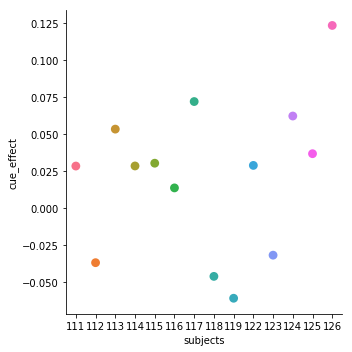

In [150]:
sns.catplot(y='cue_effect',x='subjects',kind='point',data=sub_diffs,palette='husl')

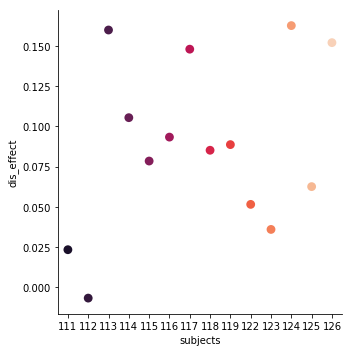

In [147]:
sns.catplot(y='dis_effect',x='subjects',kind='point',data=sub_diffs,palette='rocket')